In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

### Figure 8

This code snippet generates Figure 8 (Effect of Noise)

DO NOT edit `methods` unless you are using a source CSV with a different set of methods, as it corresponds to the order of the methods in the source CSV.

To change the legend labels, modify `legend_methods`.
If you want to change the linetypes, `linetypes` has the line type for each method in `methods`. 

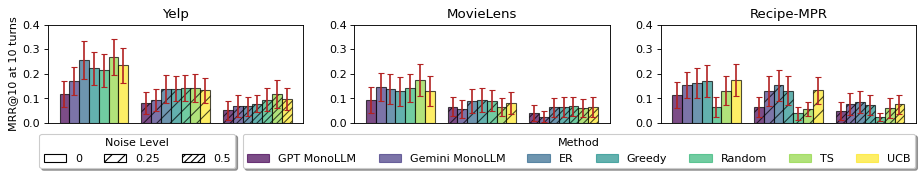

In [11]:
def map_10_noise_fixed():
    # MAP@10 big plot
    folder_path = "./"
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    methods = ['GPT MonoLLM', 'Gemini MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    legend_methods = ['GPT MonoLLM', 'Gemini MonoLLM', 'ER', 'Greedy', 'Random', 'TS', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 2), dpi=80)  
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']

    # Hard-code re-ordering


    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(titles[axis_num])

        # x = np.arange(len(methods))  # the label locations
        x = np.arange(len(noise_levels))  # the label locations
        width = 0.12  # the width of the bars

        ax.set_ylim(0,0.4)

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels)))
        results_error = np.zeros((len(methods), len(noise_levels)))

        for noise_count, noise_level in enumerate(noise_levels): # Fill results array
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/noise{noise_level}/aggregated_results.csv")
            for row_num in range(len(exp_results)):
                results[row_num, noise_count] = exp_results.loc[row_num, "map@9"]
                results_error[row_num, noise_count] = (exp_results.loc[row_num, "map@9_ub"] - exp_results.loc[row_num, "map@9_lb"]) / 2

        # Plot bars on subplot
        multiplier = 0
        for col_num, method in enumerate(methods):
            offset = width * multiplier
            rects = ax.bar(x + offset, results[col_num,:], width, yerr=results_error[col_num,:], hatch=hatches, color=colors[col_num], label=noise_level, edgecolor = "black", alpha=0.7, ecolor='firebrick', capsize=3)
            multiplier += 1

        # for col_num, noise_level in enumerate(noise_levels):
        #     offset = width * multiplier
        #     # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
        #     rects = ax.bar(x + offset, results[:,col_num], width, yerr=results_error[:,col_num], hatch=hatches[col_num], color=colors, label=noise_level, edgecolor = "black", alpha=0.7, ecolor='firebrick', capsize=3)
        #     # error_bars = ax.errorbar(x + offset, results[:,col_num], yerr=results_error[:,col_num], color="black")
        #     # ax.bar_label(rects, padding=3)
        #     multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MRR@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i], alpha=0.7) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in legend_methods], title='Method', loc='upper center', bbox_to_anchor=(0.88, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            # Opacity legend
            # alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_patches = [mpatches.Patch(facecolor="white", edgecolor="black", hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            # noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise Level', loc='upper center', bbox_to_anchor=(-0.85, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "big_MAPat10_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_noise_fixed()

### Unused Plot

I don't think this plot is used, but it shows the effect of MNLI temp on MRR@10 at Turn 10

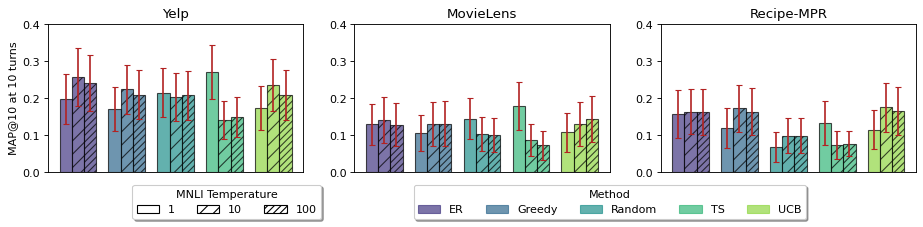

In [34]:
def map_10_temp():
    # MAP@10 big plot
    folder_path = "./"
    datasets = ['restaurants', 'movies', 'recipes']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    legend_methods = ['ER', 'Greedy', 'Random', 'TS', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    temps = ['1', '10', '100']
    alpha = 0.7
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 3), dpi=80)  
    skip_rows = 2

    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']

    noise_level = 0

    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods)+ skip_rows)] # +1 to stay syncronized with MonoLLM
    colors.pop(0)

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(titles[axis_num])

        x = np.arange(len(methods))  # the label locations
        width = 0.25  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(temps)))
        results_error = np.zeros((len(methods), len(temps)))

        for method_idx, method in enumerate(methods):
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/{method}/noise{noise_level}/aggregated_results.csv")
            for row_num in range(len(exp_results)):
                results[method_idx, row_num] = exp_results.loc[row_num, "map@9"]
                results_error[method_idx, row_num] = (exp_results.loc[row_num, "map@9_ub"] - exp_results.loc[row_num, "map@9_lb"]) / 2

        # Plot bars on subplot
        multiplier = 0
        for temp_idx, temp in enumerate(temps):
                offset = width * multiplier
                # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
                rects = ax.bar(x + offset, results[:, temp_idx], width, yerr=results_error[:,temp_idx], hatch=hatches[temp_idx], alpha=alpha, color=colors, label=temp, edgecolor = "black", ecolor='firebrick', capsize=3)
                # error_bars = ax.errorbar(x + offset, results[:,col_num, temp_idx], yerr=results_error[:,col_num], color="black")
                # ax.bar_label(rects, padding=3)
                multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        ax.set_ylim(0, 0.4)
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i], alpha=alpha) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in legend_methods], title='Method', loc='upper center', bbox_to_anchor=(1, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))
            
            # Opacity legend
            alpha_patches = [mpatches.Patch(facecolor="white", edgecolor="black", hatch=hatches[i], label=temps[i]) for i in range(len(noise_levels))]
            temp_legend = plt.legend(handles=alpha_patches, title='MNLI Temperature', loc='upper center', bbox_to_anchor=(-0.5, -0.05),
                    fancybox=True, shadow=True, ncol=len(temps))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "MAPat10_temp_noise0_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10_temp()

### Figure 6

This code snippet generates Figure 6 (Binary vs Cts Entailment)

You can edit the subset of methods used by editing `keep_subset`, `total_keeps`, and `labels`.
DO NOT edit `methods` unless you are using a source CSV with a different set of methods, as it corresponds to the order of the methods in the source CSV.

- `keep_subset`: which lines to include on each plot (based on order in `datasets`)
- `total_keeps`: methods to include in legend (probably the union of all keep subsets)
- `labels`: the actual label to display for each method in `total_keeps`

If you want to change the linetypes, `linetypes` has the line type for each method in `methods`. 

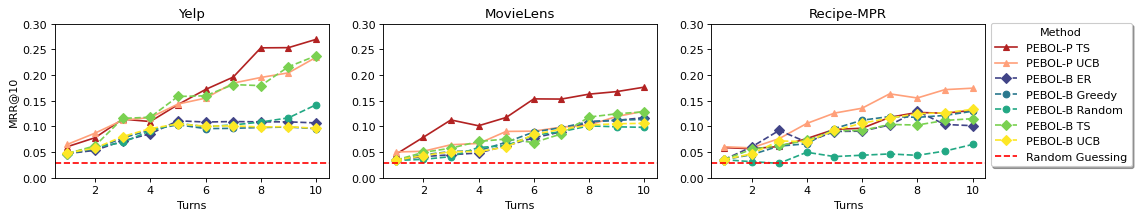

In [31]:
def map_plot_noise0_mnli0():
    datasets = ['restaurants', 'movies', 'recipes']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'TS', 'UCB']
    baseline_methods = ['GPT MonoLLM', 'Gemini MonoLLM', 'ER', 'Greedy', 'Random', 'TS', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.3,0.3,0.3]

    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']


    omit = [[],[],[]]

    main_labels = ['PEBOL-B ER','PEBOL-B Greedy','PEBOL-B Random','PEBOL-B TS','PEBOL-B UCB']

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': 'firebrick', 'marker': '^', 'line': 'solid'},
        {'color': 'lightsalmon', 'marker': '^', 'line': 'solid'},
        {'color': colors[1], 'marker': 'D', 'line': 'dashed'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashed'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashed'},
        {'color': colors[4], 'marker': 'D', 'line': 'dashed'},
        {'color': colors[5], 'marker': 'D', 'line': 'dashed'},
    ]

    fig = plt.figure(figsize=(15, 2.5), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/mnli0/aggregated_results.csv")

        # Plot baseline result
        baseline_results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        for baseline_method_idx, baseline_method in enumerate(['TS', 'UCB']):
            baseline_row_maps = []
            for turn in range(num_turns):
                    baseline_row_maps.append(baseline_results_df.loc[baseline_methods.index(baseline_method), 'map@%d' % turn])
            ax.plot(np.linspace(1,num_turns,num_turns), baseline_row_maps, marker=linetypes[baseline_method_idx]['marker'], linestyle=linetypes[baseline_method_idx]['line'], color=linetypes[baseline_method_idx]['color'], label=f"PEBOL-P {baseline_method}")

        for row_num in range(len(results_df)):
            if (methods[row_num+1] in omit[dataset_idx]):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num+2]['marker'], linestyle=linetypes[row_num+2]['line'], color=linetypes[row_num+2]['color'], label=main_labels[row_num])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MRR@10")
            

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--", label="Random Guessing")
            
        # Add legend above middle plot
        if dataset_idx == 2:
            methods_legend = ax.legend(title='Method', loc='center left', bbox_to_anchor=(1, 0.54), fancybox=True, shadow=True, ncol=1)

        ax.set_xlabel(f"Turns")

        # Shrink current axis's height by 20% on the bottom for legends
        # box = ax.get_position()
        # ax.set_position([box.x0 , box.y0 + box.height * 0.2,
        #                 box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_mnli0()

### Figure 7

This code snippet generates Figure 7 (Effect of History)

You can edit the subset of methods used by editing `keep_subset`, `total_keeps`, and `labels`.
DO NOT edit `methods` unless you are using a source CSV with a different set of methods, as it corresponds to the order of the methods in the source CSV.

- `keep_subset`: which lines to include on each plot (based on order in `datasets`)
- `total_keeps`: methods to include in legend (probably the union of all keep subsets)
- `labels`: the actual label to display for each method in `total_keeps`

If you want to change the linetypes, `linetypes` has the line type for each method in `methods`. 

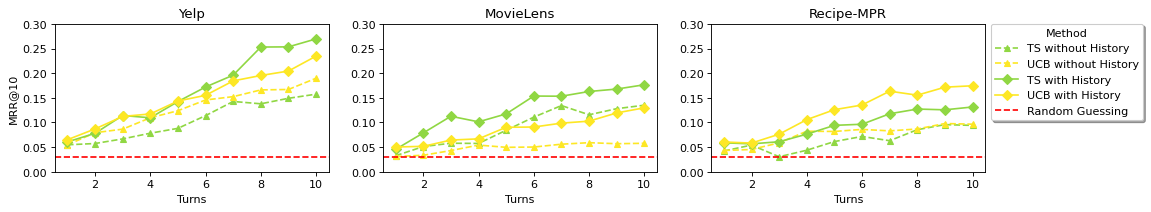

In [30]:
def map_plot_no_history():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants','movies', 'recipes']
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']
    methods = ['GPT MonoLLM', 'Gemini MonoLLM', 'ER', 'Greedy', 'Random', 'TS', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.3,0.3,0.3]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    # keep_subset = [
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    #     ['MonoLLM','Thompson','UCB','ER'],
    # ]

    keep_subset = [
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
    ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': '^', 'line': 'dashed'},
        {'color': colors[2], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
        {'color': colors[6], 'marker': 'D', 'line': 'solid'},
    ]

    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        no_hist_results_df = pd.read_csv(f"organized_results/{dataset}/no_history/aggregated_results.csv")
        
        for row_num in range(len(no_hist_results_df)):
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(no_hist_results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker="^", linestyle="dashed", color=linetypes[row_num+5]['color'], label=f"{methods[row_num+5]} without History")

        best_results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")


        # NOTE: Some hard-coding here
        thompson_maps = []
        for turn in range(num_turns):
            thompson_maps.append(best_results_df.loc[methods.index("TS"), 'map@%d' % turn])

        ax.plot(np.linspace(1,num_turns,num_turns), thompson_maps, marker="D", linestyle="solid", color=linetypes[methods.index("TS")]['color'], label="TS with History")
        
        ucb_maps = []
        for turn in range(num_turns):
            ucb_maps.append(best_results_df.loc[methods.index("UCB"), 'map@%d' % turn])
            
        ax.plot(np.linspace(1,num_turns,num_turns), ucb_maps, marker="D", linestyle="solid", color=linetypes[methods.index("UCB")]['color'], label="UCB with History")


        ax.set_ylim(0,y_maxs[dataset_idx])

        if dataset_idx == 0:
            # Add y-axis label if left-hand subplot
            ax.set_ylabel(f"MRR@10")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--", label="Random Guessing")
            
        # Add legend above middle plot
        if dataset_idx == 2:       
            methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(1.3, 0.31), fancybox=True, shadow=True, ncol=1)

        ax.set_xlabel(f"Turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_no_history()

### Figure 4

This code snippet generates Figure 4 (MRR@10 of Gemini Mono, GPT Mono, ER, TS, and UCB)

You can edit the subset of methods used by editing `keep_subset`, `total_keeps`, and `labels`.
DO NOT edit `methods` unless you are using a source CSV with a different set of methods, as it corresponds to the order of the methods in the source CSV.

- `keep_subset`: which lines to include on each plot (based on order in `datasets`)
- `total_keeps`: methods to include in legend (probably the union of all keep subsets)
- `labels`: the actual label to display for each method in `total_keeps`

If you want to change the linetypes, `linetypes` has the line type for each method in `methods`. 

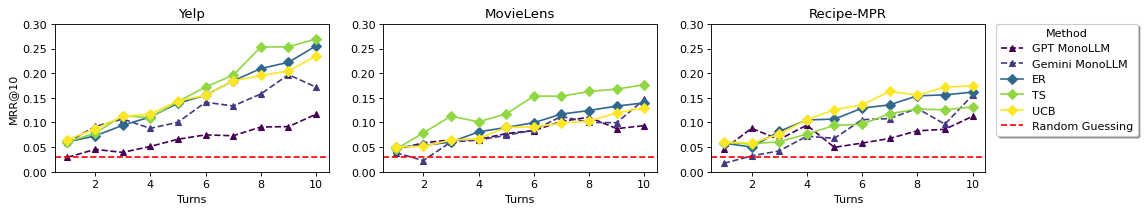

In [4]:
def map_plot_noise0_row():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']
    methods = ['GPT MonoLLM', 'Gemini MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.3,0.3,0.3]

    # omit = [[],[],[]]

    # Which lines to plot for each dataset
    keep_subset = [
        ['GPT MonoLLM', 'Gemini MonoLLM','Thompson','UCB','ER'],
        ['GPT MonoLLM', 'Gemini MonoLLM','Thompson','UCB','ER'],
        ['GPT MonoLLM', 'Gemini MonoLLM','Thompson','UCB','ER'],
    ]

    # keep_subset = [
    #     ['ER','Greedy','Random','Thompson','UCB'],
    #     ['ER','Greedy','Random','Thompson','UCB'],
    #     ['ER','Greedy','Random','Thompson','UCB'],
    # ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': '^', 'line': 'dashed'},
        {'color': colors[2], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
        {'color': colors[6], 'marker': 'D', 'line': 'solid'},
    ]

    # For when not all lines are in every plot
    total_keeps = ['GPT MonoLLM', 'Gemini MonoLLM','ER','Thompson','UCB'] 
    labels = ['GPT MonoLLM', 'Gemini MonoLLM','ER','TS','UCB', 'Random Guessing']
    # total_keeps = ['ER','Greedy','Random','Thompson','UCB']
    # labels = ['ER','Greedy','Random','TS','UCB', 'Random Guessing']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))

    methods_handles.append(mpl.lines.Line2D([0],[0], linestyle="--", color="r")) # Add random guessing line

    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num] in keep_subset[dataset_idx])):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])


            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MRR@10")
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--", label="Random Guessing")

        # Add legend above middle plot
        if dataset_idx == 2:
            methods_legend = plt.legend(methods_handles, labels, title='Method', loc='upper center', bbox_to_anchor=(1.3, 1.04),
                    fancybox=True, shadow=True, ncol=1)

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_row()

## Figure 5

This is a duplicate of the previous function but I've modified keep subset etc to create Figure 5.

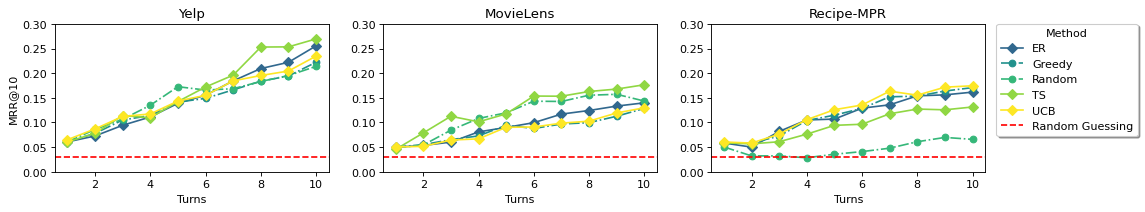

In [6]:
def map_plot_noise0_row_2():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    titles = ['Yelp', 'MovieLens', 'Recipe-MPR']
    methods = ['GPT MonoLLM', 'Gemini MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.3,0.3,0.3]

    # omit = [[],[],[]]

    # Which lines to plot for each dataset
    # keep_subset = [
    #     ['GPT MonoLLM', 'Gemini MonoLLM','Thompson','UCB','ER'],
    #     ['GPT MonoLLM', 'Gemini MonoLLM','Thompson','UCB','ER'],
    #     ['GPT MonoLLM', 'Gemini MonoLLM','Thompson','UCB','ER'],
    # ]

    keep_subset = [
        ['ER','Greedy','Random','Thompson','UCB'],
        ['ER','Greedy','Random','Thompson','UCB'],
        ['ER','Greedy','Random','Thompson','UCB'],
    ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': '^', 'line': 'dashed'},
        {'color': colors[2], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
        {'color': colors[6], 'marker': 'D', 'line': 'solid'},
    ]

    # For when not all lines are in every plot
    # total_keeps = ['GPT MonoLLM', 'Gemini MonoLLM','ER','Thompson','UCB'] 
    # labels = ['GPT MonoLLM', 'Gemini MonoLLM','ER','TS','UCB', 'Random Guessing']
    total_keeps = ['ER','Greedy','Random','Thompson','UCB']
    labels = ['ER','Greedy','Random','TS','UCB', 'Random Guessing']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))

    methods_handles.append(mpl.lines.Line2D([0],[0], linestyle="--", color="r")) # Add random guessing line

    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num] in keep_subset[dataset_idx])):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])


            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MRR@10")
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--", label="Random Guessing")

        # Add legend above middle plot
        if dataset_idx == 2:
            methods_legend = plt.legend(methods_handles, labels, title='Method', loc='upper center', bbox_to_anchor=(1.3, 1.04),
                    fancybox=True, shadow=True, ncol=1)

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_row_2()

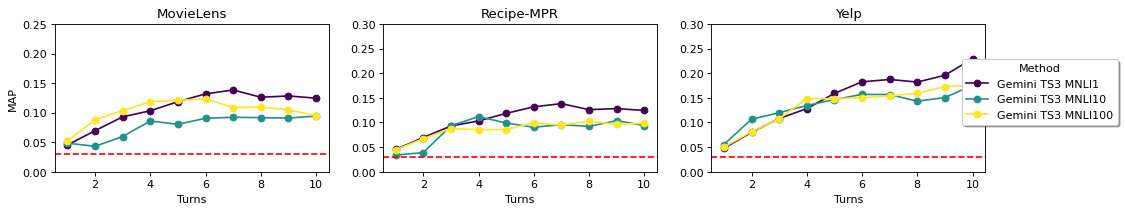

In [3]:
def map_plot_gemini():
    datasets = ['movies', 'recipes', 'restaurants']
    # datasets = ['restaurants', 'restaurants', 'restaurants']
    titles = ['MovieLens', 'Recipe-MPR', 'Yelp']
    # methods = ['Gemini Mono', 'Gemini Mono T0', 'Gemini TS3', 'Gemini UCB3', 'Gemini TS1', 'Gemini UCB1', 'Gemini Best1 Temp0', 'GPT Mono', 'GPT TS', 'GPT UCB']
    methods = ['Gemini TS3 MNLI1','Gemini TS3 MNLI10','Gemini TS3 MNLI100']


    num_turns = 10
    num_items = 100
    num_recs = 10
    y_maxs = [0.25,0.3,0.3]

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB, ER
    keep_subset = [
        ['Gemini TS3 MNLI1','Gemini TS3 MNLI10','Gemini TS3 MNLI100'],
        ['Gemini TS3 MNLI1','Gemini TS3 MNLI10','Gemini TS3 MNLI100'],
        ['Gemini TS3 MNLI1','Gemini TS3 MNLI10','Gemini TS3 MNLI100'],
    ]
    # keep_subset = [
    #     ['Gemini Mono', 'Gemini TS1', 'Gemini UCB1', 'Gemini TS3', 'Gemini UCB3'],
    #     ['Gemini Mono', 'Gemini TS1', 'Gemini UCB1', 'Gemini TS3', 'Gemini UCB3'],
    #     ['Gemini Mono', 'Gemini TS1', 'Gemini UCB1', 'Gemini TS3', 'Gemini UCB3'],
    # ]

    # keep_subset = [
    #     ['Thompson', 'Random', 'Greedy'],
    #     ['Thompson', 'Random', 'Greedy'],
    #     ['UCB', 'Random', 'Greedy'],
    # ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': 'o', 'line': 'solid'},
        {'color': colors[1], 'marker': 'o', 'line': 'solid'},
        {'color': colors[2], 'marker': 'o', 'line': 'solid'},
    ]

    # For when not all lines are in every plot
    # total_keeps = ['Gemini Mono', 'Gemini Mono T0', 'Gemini TS3', 'Gemini UCB3', 'Gemini TS1', 'Gemini UCB1', 'Gemini Best1 Temp0', 'GPT Mono', 'GPT TS', 'GPT UCB']
    # labels = ['Gemini Mono T1', 'Gemini Mono T0', 'Gemini TS3', 'Gemini UCB3', 'Gemini TS1', 'Gemini UCB1', 'Gemini Best1 Temp0', 'GPT Mono', 'GPT TS', 'GPT UCB']
    total_keeps = ['Gemini TS3 MNLI1','Gemini TS3 MNLI10','Gemini TS3 MNLI100']
    labels = ['Gemini TS3 MNLI1','Gemini TS3 MNLI10','Gemini TS3 MNLI100']
    # total_keeps = ['Greedy','Random','Thompson','UCB']
    # labels = ['Greedy','Random','TS','UCB']
    methods_handles = []
    for method in total_keeps:
        methods_handles.append(mpl.lines.Line2D([0],[0], marker=linetypes[methods.index(method)]['marker'], linestyle=linetypes[methods.index(method)]['line'], color=linetypes[methods.index(method)]['color']))


    fig = plt.figure(figsize=(15, 3), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{titles[dataset_idx]}")

        # results_df = pd.read_csv(f"organized_results/{dataset}/gemini/aggregated_results.csv")
        results_df = pd.read_csv(f"experiments/aug_10_gem_gpt_{dataset}_ts_sweep/aggregated_results.csv")
        
        for row_num in range(len(results_df)):
            if not((methods[row_num] in keep_subset[dataset_idx])):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])


            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'])

            ax.set_ylim(0,y_maxs[dataset_idx])

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP")
            
            # Add legend above middle plot
            if dataset_idx == 2:
                methods_legend = plt.legend(methods_handles, labels, title='Method', loc='upper center', bbox_to_anchor=(1.2, 0.8),
                        fancybox=True, shadow=True, ncol=1)
                
                # methods_legend = ax.legend(title='Method', loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_gemini()

## Beta Distn Plot

The following code snippet creates the example Beta visualization. I edited the output of this function in drawio to get Figure 1.

Using MPS


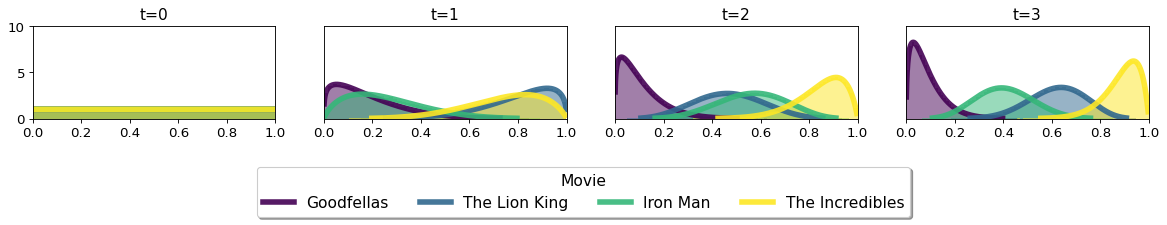

In [26]:


# Crime NO, Children YES, Superhero YES, animated YES -> looking for incredibles

from item_scorers.mnli_scorer import MNLIScorer
import yaml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def custom_beta_plot():
    movies = {
                # 0: {"description": "Movie Title: Heat (1995) \n Genres: Action, Crime, Thriller \n Tags: Al Pacino, Robert De Niro, realistic action, great acting, suspense, atmospheric, crime, tense, dialogue, bank robbery, long, Michael Mann, gunfight, Val Kilmer, Natalie Portman, realistic, overrated, philosophy, Los Angeles, visceral"},
                # 1: {"description": "Movie Title: Guardians of the Galaxy (2014) \n Genres: Action, Adventure, Sci-Fi \n Tags: great soundtrack, sci-fi, space, Marvel, fun, Great Visuals, Marvel Cinematic Universe, adventure, humorous, Chris Pratt, childish, fantasy, science fiction, Action, superhero, overrated, talking animals, characters with individual goals, comic book, Vin Diesel"},
                2: {"title": "Goodfellas", "description": "Movie Title: Goodfellas (1990) \n Genres: Crime, Drama \n Tags: Martin Scorsese, mafia, organized crime, dark comedy, Robert De Niro, good dialogue, crime, masterpiece, gangsters, violence, Samuel L. Jackson, Ray Liotta, narrated, robert de niro, stylish, Joe Pesci, gritty, disturbing, based on a book, biography"},
                # 3: {"description": "Movie Title: Penguins of Madagascar (2014) \n Genres: Adventure, Animation, Children, Comedy \n Tags: talking animals, comedy, humorous, Animation, Christopher Knights, Eric Darnell, Simon J. Smith, Tom McGrath, adventure, franchise, good versus evil, octopus gets bad rap, series:madagascar, the north wind, watch the credits, 3d, Bechdel test:Fail, IMAX DMR 3-D, IMAX Digital only, MOLT_CRITICADA"},
                # 4: {"title": "Schindler's List", "description": "Movie Title: Schindler's List (1993) \n Genres: Drama, War \n Tags: World War II, true story, Steven Spielberg, holocaust, based on a true story, Holocaust, historical, thought-provoking, Nazis, black and white, history, disturbing, Oscar (Best Picture), Liam Neeson, atmospheric, WWII, classic, drama, Oscar (Best Cinematography), war"},
                5: {"title": "The Lion King", "description": "Movie Title: Lion King, The (1994) \n Genres: Adventure, Animation, Children, Drama, Musical, IMAX \n Tags: Disney, animation, coming of age, animals, musical, soundtrack, lions, father-son relationship, talking animals, africa, Oscar (Best Music - Original Song), inspirational, classic, Disney animated feature, Hans Zimmer, Oscar (Best Music - Original Score), Childhood, Matthew Broderick, fun, Rowan Atkinson"},
                6: {"title": "Iron Man", "description": "Movie Title: Iron Man (2008) \n Genres: Action, Adventure, Sci-Fi \n Tags: superhero, Robert Downey Jr., Marvel, technology, comic book, sci-fi, funny, action, Gwyneth Paltrow, superheroes, based on a comic, vigilante, Jeff Bridges, Robert Downey Jr, military, Iron Man, Marvel Cinematic Universe, adventure, visually appealing, arms dealer"},
                7: {"title": "The Incredibles", "description": "Movie Title: Incredibles, The (2004) \n Genres: Action, Adventure, Animation, Children, Comedy \n Tags: Pixar, superhero, animation, comedy, family, super-hero, Adventure, action, Disney, funny, Samuel L. Jackson, imdb top 250, superheroes, stylized, Oscar (Best Animated Feature), comic book, self discovery, alter ego, secret identity, Animation"},
                # 8: {"description": "Movie Title: Sin City (2005) \n Genres: Action, Crime, Film-Noir, Mystery, Thriller \n Tags: stylized, Quentin Tarantino, multiple storylines, atmospheric, black comedy, Bruce Willis, comic book, visually appealing, violence, dark, storytelling, brutality, surrealism, artistic, surreal, Action, Frank Miller, Nudity (Topless), cannibalism, violent"}
    }

    config_path = "./experiments/jan_19_movies_100_users_noise0_ucb/noise_0_selection_ucb_mnli_temp_1/config.yaml"
    with open(config_path, "r") as config_file:
        config_dict = yaml.safe_load(config_file)
    config_dict['item_scoring']['batch_size'] = len(movies)
    mnli = MNLIScorer(config_dict)
    beliefs = {
        # 0: {"alpha": 0.5, "beta": 0.5},
        # 1: {"alpha": 0.5, "beta": 0.5},
        2: {"alpha": 1, "beta": 1},
        # 3: {"alpha": 0.5, "beta": 0.5},
        # 4: {"alpha": 0.5, "beta": 0.5},
        5: {"alpha": 1, "beta": 1},
        6: {"alpha": 1, "beta": 1},
        7: {"alpha": 1, "beta": 1},
        # 8: {"alpha": 0.5, "beta": 0.5},
    }

    # Set up variables for plotting
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(beliefs))] 
    fig = plt.figure(figsize=(18, 1.5), dpi=80) 
    y_max = 10
    hist_samples = 50000
    line_samples = 10000

    prefs = ['child appropriate', 'superhero', 'animated']
    # prefs = ['animated'] 

    # Font sizes
    title_font_size = 14
    major_ticks_font_size = 12
    minor_ticks_font_size = 12
    label_font_size = 14
    legend_font_size = 14
    legend_title_font_size = 14

    # Create base figure
    ax = fig.add_subplot(1,len(prefs)+1, 1)
    ax.set_title(f"t=0", fontsize=title_font_size)
    for i, (belief_id, belief) in enumerate(beliefs.items()):   
        a = belief['alpha']
        b = belief['beta']
        x = np.linspace(stats.beta.ppf(0.001, a, b), stats.beta.ppf(0.999, a, b), line_samples)
        ax.plot(x, stats.beta.pdf(x, a, b), color=colors[i], lw=5, alpha=0.9, label=movies[belief_id]['title'])

        # Dist plot
        data = np.random.beta(a,b, size=hist_samples)
        ax.hist(data, 50, color=colors[i], lw=5, alpha=0.5, density=True)
        # ax.set_ylabel("$p(u_i|x_i, \mathcal{H}^{t-1},\omega)$", fontsize=label_font_size)
        # ax.set_xlabel("$u_i$", fontsize=label_font_size)
        ax.set_ylim(0,y_max)
        ax.set_xlim(0,1.0)
        ax.tick_params(axis='both', which='major', labelsize=major_ticks_font_size)
        ax.tick_params(axis='both', which='major', labelsize=minor_ticks_font_size)

    # Get entailment scores for each preference statement, creating a plot in between each update
    for pref_num, pref in enumerate(prefs):
        like_probs = mnli.score_items(pref, movies)
        # print("like_probs:", like_probs)
        stretch_factor = 5
        for item_id in movies:
                new_alpha = beliefs[item_id]['alpha'] + stretch_factor*like_probs[item_id] # new_alpha = old_alpha + L
                new_beta = stretch_factor*(1 - like_probs[item_id]) + beliefs[item_id]['beta'] # new_beta = 1 - L + old_beta
                beliefs[item_id] = {'alpha': new_alpha, 'beta': new_beta}

        # Now plot the beta distributions:
        ax = fig.add_subplot(1,len(prefs)+1, pref_num+2)
        ax.set_title(f"t={pref_num + 1}", fontsize=title_font_size)
        for i, (belief_id, belief) in enumerate(beliefs.items()):   
            a = belief['alpha']
            b = belief['beta']
            x = np.linspace(stats.beta.ppf(0.001, a, b), stats.beta.ppf(0.999, a, b), line_samples)
            ax.plot(x, stats.beta.pdf(x, a, b), color=colors[i], lw=5, alpha=0.9, label=movies[belief_id]['title'])

            # Dist plot
            data = np.random.beta(a,b, size=hist_samples)
            ax.hist(data, 50, color=colors[i], lw=5, alpha=0.5, density=True)
            ax.set_yticks([])
            ax.set_ylim(0,y_max)
            ax.set_xlim(0,1.0)
            ax.tick_params(axis='both', which='major', labelsize=major_ticks_font_size)
            ax.tick_params(axis='both', which='major', labelsize=minor_ticks_font_size)

        # ax.set_xlabel("$u_i$", fontsize=label_font_size)

        if pref_num == 1:
            methods_legend = ax.legend(title='Movie', loc='lower center', bbox_to_anchor=(-0.13, -1.15),
                fancybox=True, shadow=True, ncol=len(movies), fontsize=legend_font_size, title_fontsize=legend_title_font_size)
    plt.show()
    

custom_beta_plot()


This code snippet gives a single unlabeled beta distribution plot. This is used in the PEBOL diagram in Fig 2

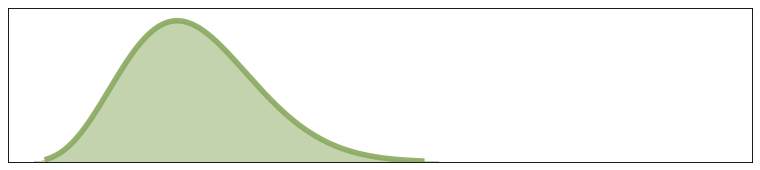

In [58]:
import yaml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def mini_beta_plot():
    fig = plt.figure(figsize=(12, 2.5), dpi=80) 
    y_max = 5
    hist_samples = 10000000
    line_samples = 10000000

    title_font_size = 14
    major_ticks_font_size = 12
    minor_ticks_font_size = 12
    label_font_size = 14
    legend_font_size = 14
    legend_title_font_size = 14

    # Create base figure
    ax = fig.add_subplot(1,1,1)
    # ax.set_title(f"t=0", fontsize=title_font_size)

    # #81689B - purple
    # a = 6
    # b = 3
    # #f3db72 - yellow
    # a = 5.5
    # b = 7.5
    # #89A95E - green
    a = 6
    b = 18
    x = np.linspace(stats.beta.ppf(0.001, a, b), stats.beta.ppf(0.999, a, b), line_samples)
    ax.plot(x, stats.beta.pdf(x, a, b), color="#89A95E", lw=5, alpha=0.9)

    # Dist plot
    data = np.random.beta(a,b, size=hist_samples)
    ax.hist(data, 500, color="#89A95E", lw=5, alpha=0.5, density=True)

    ax.set_ylim(0,y_max)
    ax.set_xlim(0,1.0)
    ax.tick_params(axis='both', which='major', labelsize=major_ticks_font_size)
    ax.tick_params(axis='both', which='major', labelsize=minor_ticks_font_size)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()
    

mini_beta_plot()


## Table Generators

Below here is the code for generating different latex tables

In [29]:
from tabulate import tabulate

def table_generator():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'recipes', 'movies']
    titles = ['Yelp', 'Recipe-MPR', 'MovieLens']
    methods = ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    # row_names = ['Mono Gemini Mean', 'Mono Gemini CI LB', 'Mono Gemini CI UB', 'PEBOL TS Mean', 'PEBOL TS CI LB', 'PEBOL TS CI UB', 'PEBOL UCB Mean', 'PEBOL UCB CI LB', 'PEBOL UCB CI UB']
    num_turns = 10

    keep_names = [
        ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
        ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
        ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
    ]

    table_dict = {}
    
    for dataset_idx, dataset in enumerate(datasets): 

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")

        row_names = ["Mean", "CI LB", "CI UB"]
            
        for row in range(len(methods)):
            means = []
            lbs = []
            ubs = []
            for turn in range(num_turns):
                if methods[row] in keep_names[dataset_idx]:       
                    mean = results_df.loc[row, f"map@{turn}"]
                    ci_top = results_df.loc[row, f"map@{turn}_ub"]
                    ci_bottom = results_df.loc[row, f"map@{turn}_lb"]
                    means.append(mean)
                    lbs.append(ci_bottom)
                    ubs.append(ci_top)

            table_dict[f"{methods[row]} Mean"] = means
            table_dict[f"{methods[row]} CI LB"] = lbs
            table_dict[f"{methods[row]} CI UB"] = ubs

        final_df = pd.DataFrame(table_dict)
        # final_df = pd.DataFrame(table_dict)
        df_transposed = final_df.T
        df_transposed.index.name = "Turn"
        df_transposed.columns = ['1','2','3','4','5','6','7','8','9','10']
        df_transposed.style.format(decimal='.', thousands=',', precision=2)
        df_transposed = df_transposed.round(2)

        print(f"{titles[dataset_idx]}")
        with open(f'tables/latex_table_{dataset}.txt', 'w') as f:
            # f.write(tabulate(final_df, headers='keys', tablefmt='psql'))
            f.write(df_transposed.to_latex(float_format=lambda x: '%10.2f' % x))
            # print(df_transposed)
            # f.write(df_transposed.style.highlight_max(axis=0, props="font-weight:bold;").to_latex(convert_css=True))
        # final_df.to_html('temp_table.html')



table_generator()

Yelp
Recipe-MPR
MovieLens


In [16]:
from tabulate import tabulate

def table_generator_noise():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'recipes', 'movies']
    titles = ['Yelp', 'Recipe-MPR', 'MovieLens']
    methods = ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    # row_names = ['Mono Gemini Mean', 'Mono Gemini CI LB', 'Mono Gemini CI UB', 'PEBOL TS Mean', 'PEBOL TS CI LB', 'PEBOL TS CI UB', 'PEBOL UCB Mean', 'PEBOL UCB CI LB', 'PEBOL UCB CI UB']
    num_turns = 10

    keep_names = [
        ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
        ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
        ['MonoLLM GPT', 'MonoLLM Gemini', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
    ]

    noise_levels = [0, 0.25, 0.5]

    table_dict = {}
    
    for dataset_idx, dataset in enumerate(datasets): 

        row_names = ["Mean", "CI LB", "CI UB"]
                
        for row in range(len(methods)):
                means = []
                lbs = []
                ubs = []
                for noise_level in noise_levels:
                    results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")
                    if methods[row] in keep_names[dataset_idx]:       
                        mean = results_df.loc[row, f"map@9"]
                        ci_top = results_df.loc[row, f"map@9_ub"]
                        ci_bottom = results_df.loc[row, f"map@9_lb"]
                        means.append(mean)
                        lbs.append(ci_bottom)
                        ubs.append(ci_top)

                table_dict[f"{methods[row]} Mean"] = means
                table_dict[f"{methods[row]} CI LB"] = lbs
                table_dict[f"{methods[row]} CI UB"] = ubs

        final_df = pd.DataFrame(table_dict)
        # final_df = pd.DataFrame(table_dict)
        final_df.style.format(decimal='.', thousands=',', precision=2)
        final_df = final_df.round(2)
        df_transposed = final_df.T
        df_transposed.index.name = "Noise Level"
        df_transposed.columns = ['0', '0.25', '0.5']

        print(f"{titles[dataset_idx]}")
        with open(f'tables/latex_table_{dataset}_noise.txt', 'w') as f:
            # f.write(tabulate(final_df, headers='keys', tablefmt='psql'))
            f.write(df_transposed.to_latex(float_format=lambda x: '%10.2f' % x))
        # final_df.to_html('temp_table.html')



table_generator_noise()

Yelp
Recipe-MPR
MovieLens


In [8]:
from tabulate import tabulate

def table_generator_mnli0():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'recipes', 'movies']
    titles = ['Yelp', 'Recipe-MPR', 'MovieLens']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    # row_names = ['Mono Gemini Mean', 'Mono Gemini CI LB', 'Mono Gemini CI UB', 'PEBOL TS Mean', 'PEBOL TS CI LB', 'PEBOL TS CI UB', 'PEBOL UCB Mean', 'PEBOL UCB CI LB', 'PEBOL UCB CI UB']
    num_turns = 10

    keep_names = [
        ['ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
        ['ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
        ['ER', 'Greedy', 'Random', 'Thompson', 'UCB'],
    ]

    table_dict = {}
    
    for dataset_idx, dataset in enumerate(datasets): 

        results_df = pd.read_csv(f"organized_results/{dataset}/mnli0/aggregated_results.csv")

        row_names = ["Mean", "CI LB", "CI UB"]
            
        for row in range(len(methods)):
            means = []
            lbs = []
            ubs = []
            for turn in range(num_turns):
                if methods[row] in keep_names[dataset_idx]:       
                    mean = results_df.loc[row, f"map@{turn}"]
                    ci_top = results_df.loc[row, f"map@{turn}_ub"]
                    ci_bottom = results_df.loc[row, f"map@{turn}_lb"]
                    means.append(mean)
                    lbs.append(ci_bottom)
                    ubs.append(ci_top)

            table_dict[f"{methods[row]} Mean"] = means
            table_dict[f"{methods[row]} CI LB"] = lbs
            table_dict[f"{methods[row]} CI UB"] = ubs

        final_df = pd.DataFrame(table_dict)
        # final_df = pd.DataFrame(table_dict)
        final_df.style.format(decimal='.', thousands=',', precision=2)
        final_df = final_df.round(2)
        df_transposed = final_df.T
        df_transposed.index.name = "Turn"
        df_transposed.columns = ['1','2','3','4','5','6','7','8','9','10']

        print(f"{titles[dataset_idx]}")
        with open(f'tables/latex_table_{dataset}_mnli0.txt', 'w') as f:
            # f.write(tabulate(final_df, headers='keys', tablefmt='psql'))
            f.write(df_transposed.to_latex(float_format=lambda x: '%10.2f' % x))
        # final_df.to_html('temp_table.html')



table_generator_mnli0()

Yelp
Recipe-MPR
MovieLens


In [26]:
from tabulate import tabulate

# Keeping table_generator set to the default folder, this one will be for modifying
def table_generator_no_hist():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'recipes', 'movies']
    titles = ['Yelp', 'Recipe-MPR', 'MovieLens']
    methods = ['Thompson', 'UCB']
    # row_names = ['Mono Gemini Mean', 'Mono Gemini CI LB', 'Mono Gemini CI UB', 'PEBOL TS Mean', 'PEBOL TS CI LB', 'PEBOL TS CI UB', 'PEBOL UCB Mean', 'PEBOL UCB CI LB', 'PEBOL UCB CI UB']
    num_turns = 10

    keep_names = [
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
        ['Thompson', 'UCB'],
    ]

    table_dict = {}
    
    for dataset_idx, dataset in enumerate(datasets): 

        results_df = pd.read_csv(f"organized_results/{dataset}/no_history/aggregated_results.csv")

        row_names = ["Mean", "CI LB", "CI UB"]
            
        for row in range(len(methods)):
            means = []
            lbs = []
            ubs = []
            for turn in range(num_turns):
                if methods[row] in keep_names[dataset_idx]:       
                    mean = results_df.loc[row, f"map@{turn}"]
                    ci_top = results_df.loc[row, f"map@{turn}_ub"]
                    ci_bottom = results_df.loc[row, f"map@{turn}_lb"]
                    means.append(mean)
                    lbs.append(ci_bottom)
                    ubs.append(ci_top)

            table_dict[f"{methods[row]} Mean"] = means
            table_dict[f"{methods[row]} CI LB"] = lbs
            table_dict[f"{methods[row]} CI UB"] = ubs

        final_df = pd.DataFrame(table_dict)
        # final_df = pd.DataFrame(table_dict)
        final_df.style.format(decimal='.', thousands=',', precision=2)
        final_df = final_df.round(2)
        df_transposed = final_df.T
        df_transposed.index.name = "Turn"

        print(f"{titles[dataset_idx]}")
        with open(f'tables/latex_table_{dataset}_no_hist.txt', 'w') as f:
            # f.write(tabulate(final_df, headers='keys', tablefmt='psql'))
            f.write(df_transposed.to_latex(float_format=lambda x: '%10.2f' % x))
        # final_df.to_html('temp_table.html')



table_generator_no_hist()

Yelp
Recipe-MPR
MovieLens


In [ ]:
from tabulate import tabulate

def old_table_generator():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'recipes', 'movies']
    titles = ['Yelp', 'Recipe-MPR', 'MovieLens']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    # row_names = ['Mono Gemini Mean', 'Mono Gemini CI LB', 'Mono Gemini CI UB', 'PEBOL TS Mean', 'PEBOL TS CI LB', 'PEBOL TS CI UB', 'PEBOL UCB Mean', 'PEBOL UCB CI LB', 'PEBOL UCB CI UB']
    num_turns = 10

    keep_names = [
        ['Mono Gemini', 'PEBOL TS', 'PEBOL UCB'],
        ['Mono Gemini', 'PEBOL TS', 'PEBOL UCB'],
        ['Mono Gemini', 'PEBOL TS', 'PEBOL UCB'],
    ]

    row_names = []
    for method in methods:
        row_names.append(f"{method} Mean")
        row_names.append(f"{method} CI LB")
        row_names.append(f"{method} CI UB")

    for dataset_idx, dataset in enumerate(datasets): 

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")
        # results_df = pd.read_csv(f"experiments/jun_15_gem_gpt_mono_{dataset}_100_items_100_users/aggregated_results.csv")
        
        table_dict = {}
        
        for turn in range(num_turns):
            col_list = []
            for row in range(len(methods)):
                if methods[row] in keep_names[dataset_idx]:
                    mean = results_df.loc[row, f"map@{turn}"]
                    ci_top = results_df.loc[row, f"map@{turn}_ub"]
                    ci_bottom = results_df.loc[row, f"map@{turn}_lb"]
                    col_list.append(mean)
                    col_list.append(ci_bottom)
                    col_list.append(ci_top)
            table_dict[f"{turn}"] = col_list

        final_df = pd.DataFrame(table_dict, index=row_names)
        final_df = final_df.round(2)
        final_df.index.name = "Turn"

        print(f"{titles[dataset_idx]}")
        with open(f'latex_table_{dataset}.txt', 'w') as f:
            # f.write(tabulate(final_df, headers='keys', tablefmt='psql'))
            f.write(final_df.to_latex())
        # final_df.to_html('temp_table.html')



old_table_generator()

ValueError: Length of values (0) does not match length of index (18)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


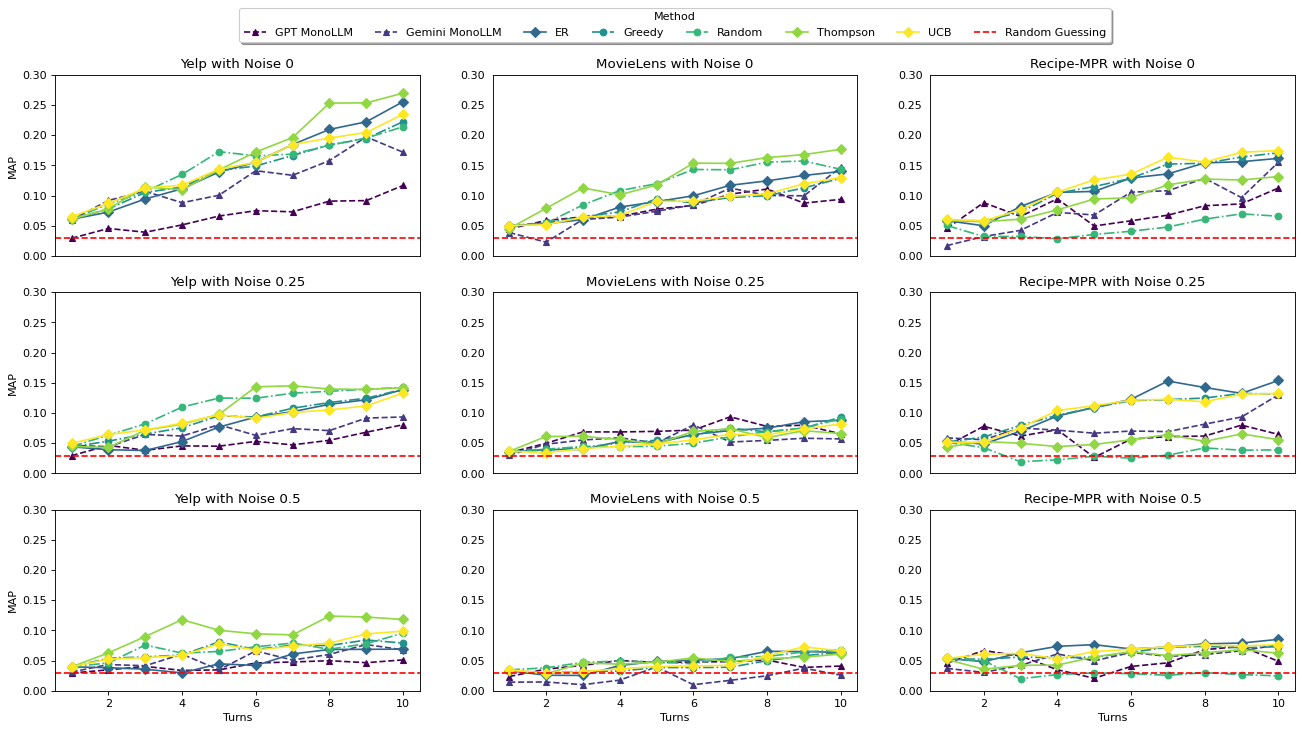

In [42]:
def map_plot_noise_grid():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['restaurants', 'movies', 'recipes']
    dataset_titles = ["Yelp", "MovieLens", "Recipe-MPR"]
    methods = ['GPT MonoLLM', 'Gemini MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': '^', 'line': 'dashed'},
        {'color': colors[2], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
        {'color': colors[6], 'marker': 'D', 'line': 'solid'},
    ]

    fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(20, 10), dpi=80)  

    for dataset_idx, dataset in enumerate(datasets):

        for noise_idx, noise_level in enumerate(noise_levels):

            axs[noise_idx, dataset_idx].set_title(f"{dataset_titles[dataset_idx]} with Noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                for turn in range(num_turns):
                    row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods[row_num])

                axs[noise_idx, dataset_idx].set_ylim(0,y_max)

                if dataset_idx == 0:
                    # Add y-axis label if left-hand subplot
                    axs[noise_idx, dataset_idx].set_ylabel(f"MAP")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='y',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        right=False,      # ticks along the bottom edge are off
                        left=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

                if noise_idx+1 == len(noise_levels):
                    axs[noise_idx, dataset_idx].set_xlabel(f"Turns")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='x',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

            p_select_position = 1 / num_items
            total_maps = 0.0
            for i in range(num_recs):
                total_maps += (1 / (i+1))
            total_maps *= p_select_position
            # print(total_maps)
            axs[noise_idx, dataset_idx].axhline(y=total_maps, color="r", linestyle="--", label='Random Guessing')

            # # Shrink current axis's height by 10% on the bottom for legends
            # box = axs[noise_idx, dataset_idx].get_position()
            # axs[noise_idx, dataset_idx].set_position([box.x0, box.y0 + box.height * 0.1,
            #                 box.width, box.height * 0.9])
            
        methods_legend = axs[0, 1].legend(title='Method', loc='upper center', bbox_to_anchor=(0.5, 1.4),
            fancybox=True, shadow=True, ncol=(len(methods)+1))

    # Save and show 
    file_name = "big_map_grid_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise_grid()

In [70]:
def max_win():
    max_win = 0.0
    conditions = ""
    # datasets = ['recipes', 'recipes', 'restaurants']
    datasets = ['movies']
    methods = ['ER', 'Greedy', 'Random', 'Thompson', 'UCB']

    for dataset in datasets:     
        mono_df = pd.read_csv(f"organized_results/{dataset}/mono/aggregated_results.csv")
        for method in methods:
            turn = 9
            results_df = pd.read_csv(f"organized_results/{dataset}/{method}/noise0/aggregated_results.csv")
            mono_score = mono_df.loc[0, 'map@%d' % turn]
            for row_num in range(len(results_df)):
                results_score = results_df.loc[row_num, 'map@%d' % turn]
                win = (results_score - mono_score) / mono_score
                if win > max_win:
                    max_win = win
                    conditions = f"{dataset}, {method}, {row_num}"

    print(max_win)
    print(conditions)
    
max_win()

0.8843759264749483
movies, Thompson, 0
